<a href="https://colab.research.google.com/github/AnshikaSolanki24/ALL_project/blob/main/10_blood_cancer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Preparing The DataSet***

In [ ]:
from google.colab import drive
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Loading General Tools and Libraries
import os
import random
import shutil
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers
plt.style.use('ggplot')

In [ ]:
classes =["benign", "early", "pre", "pro"]
OriginalDataPath = "/content/drive/MyDrive/bloodCancer/train"
TestDataPath = "/content/drive/MyDrive/bloodCancer/test/"

In [ ]:
image_size = (256,256)
batch_size = 32
validation_split = 0.2
seed = 199

train_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/bloodCancer/train',
    class_names = ["benign", "early", "pre", "pro"],
    batch_size=batch_size,
    image_size=image_size,
    seed=seed,
    validation_split=validation_split,
    subset="training"
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/bloodCancer/valid',
    class_names = ["benign", "early", "pre", "pro"],
    batch_size=batch_size,
    image_size=image_size,
    seed=seed,
    validation_split=validation_split,
    subset="validation"
)

test_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/bloodCancer/test',
    class_names =["benign", "early", "pre", "pro"],
    image_size=image_size,
    batch_size=32,
    shuffle=False)

Found 2352 files belonging to 4 classes.
Using 1882 files for training.
Found 438 files belonging to 4 classes.
Using 87 files for validation.
Found 469 files belonging to 4 classes.


In [ ]:
train_data2 = train_data.map(lambda x, y: (255-x, y))
validation_data2 = validation_data.map(lambda x, y: (255-x, y))
test_data2 = test_data.map(lambda x, y: (255-x, y))

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    layers.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2),fill_mode='constant', fill_value=0),
    layers.RandomRotation(0.3, fill_mode='constant', fill_value=0)
])

augmented_train_data = train_data2
for i in range(4):
  augmented_train_data = augmented_train_data.concatenate(train_data2.map(lambda x, y: (data_augmentation (x), y)))

In [ ]:
pre_trained_data = train_data2
pre_trained_validation_data = validation_data2

In [ ]:
#defining y_test
import os

test_data_directory = '/content/drive/MyDrive/bloodCancer/test'
class_names = ["benign", "early", "pre", "pro"]
y_test = []

for class_name in class_names:
    class_path = os.path.join(test_data_directory, class_name)
    num_samples = len(os.listdir(class_path))
    class_labels = [class_names.index(class_name)] * num_samples
    y_test.extend(class_labels)

# Convert y_test to a NumPy array
import numpy as np
y_test = np.array(y_test)


# ***CNN***

In [ ]:
#Model Architecture Define
MyOwnModel = keras.models.Sequential([
    layers.RandomRotation(0.1, fill_mode='constant', fill_value=0, input_shape=image_size + (3,)),
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])
MyOwnModel.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_8 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_flip_16 (RandomFlip  (None, 256, 256, 3)       0         
 )                                                               
                                                                 
 random_flip_17 (RandomFlip  (None, 256, 256, 3)       0         
 )                                                               
                                                                 
 conv2d_104 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                               

In [ ]:
#Model Creation and Training
MyOwnModel.compile(
    optimizer=keras.optimizers.Adam(2*1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)
epochs = 40
history_myown = MyOwnModel.fit(
    train_data2, epochs=epochs,
    validation_data=validation_data2)
MyOwnModel.save('MyOwnModel.h5')

Epoch 1/40
59/59 [==============================] - 11s 107ms/step - loss: 1.8861 - accuracy: 0.4984 - val_loss: 0.5577 - val_accuracy: 0.8506
Epoch 2/40
59/59 [==============================] - 5s 76ms/step - loss: 0.6162 - accuracy: 0.7774 - val_loss: 0.4695 - val_accuracy: 0.8851
Epoch 3/40
59/59 [==============================] - 9s 142ms/step - loss: 0.5761 - accuracy: 0.7710 - val_loss: 0.4865 - val_accuracy: 0.8391
Epoch 4/40
59/59 [==============================] - 6s 87ms/step - loss: 0.4241 - accuracy: 0.8385 - val_loss: 0.4800 - val_accuracy: 0.8736
Epoch 5/40
59/59 [==============================] - 6s 86ms/step - loss: 0.3680 - accuracy: 0.8576 - val_loss: 0.5984 - val_accuracy: 0.8391
Epoch 6/40
59/59 [==============================] - 6s 95ms/step - loss: 0.3288 - accuracy: 0.8757 - val_loss: 0.3062 - val_accuracy: 0.9310
Epoch 7/40
59/59 [==============================] - 5s 72ms/step - loss: 0.3112 - accuracy: 0.8804 - val_loss: 0.4084 - val_accuracy: 0.8966
Epoch 8/40

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


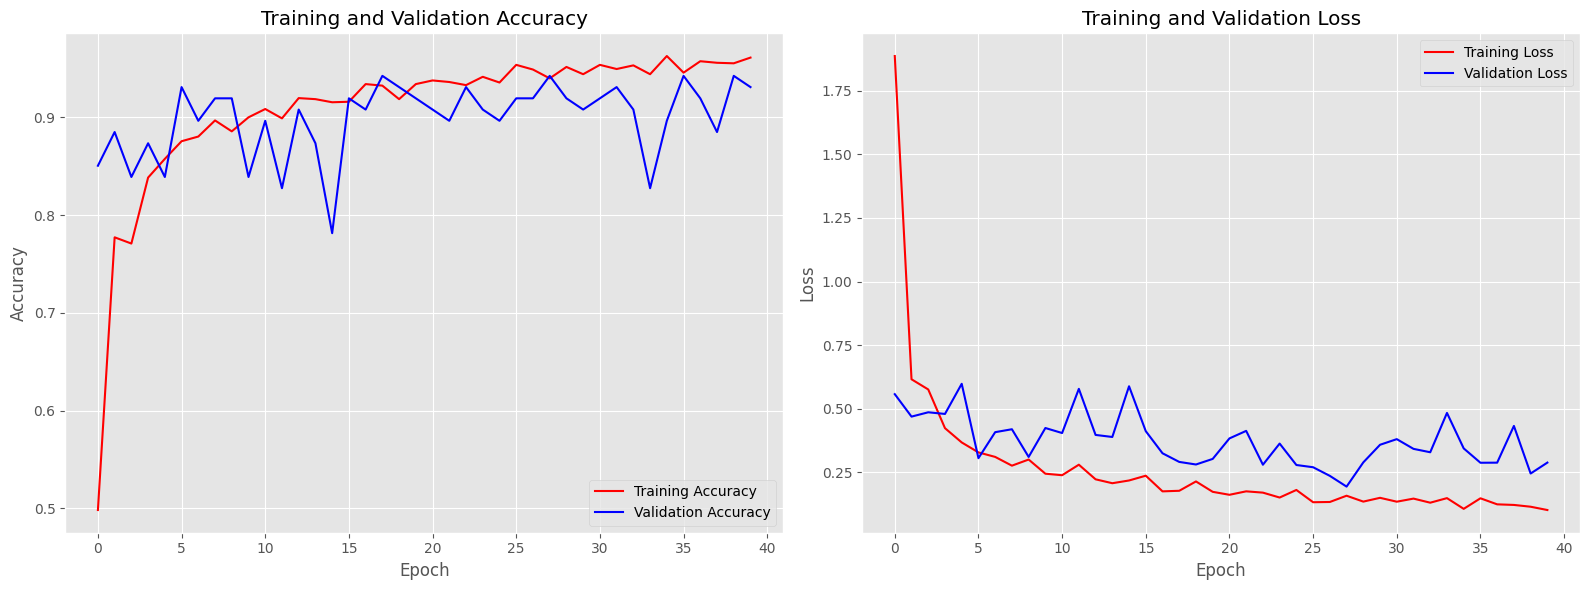

In [ ]:
#Accuracy Curve
import matplotlib.pyplot as plt

MyOwnModel_acc = history_myown.history['accuracy']
MyOwnModel_val_acc = history_myown.history['val_accuracy']
MyOwnModel_loss = history_myown.history['loss']
MyOwnModel_val_loss = history_myown.history['val_loss']
epochs = range(len(MyOwnModel_acc))

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Accuracy Curve
ax1.plot(epochs, MyOwnModel_acc, 'r', label="Training Accuracy")
ax1.plot(epochs, MyOwnModel_val_acc, 'b', label="Validation Accuracy")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='lower right')

# Plot Loss Curve
ax2.plot(epochs, MyOwnModel_loss, 'r', label="Training Loss")
ax2.plot(epochs, MyOwnModel_val_loss, 'b', label="Validation Loss")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


15/15 [==============================] - 1s 69ms/step
accuracy score on test data:
 0.8912579957356077
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        84
           1       0.88      0.88      0.88       121
           2       0.89      1.00      0.94       144
           3       0.97      0.87      0.92       120

    accuracy                           0.89       469
   macro avg       0.89      0.88      0.88       469
weighted avg       0.89      0.89      0.89       469



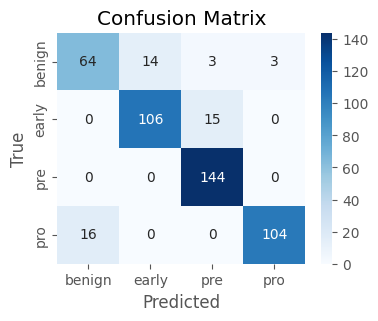

In [ ]:
#Model Performance Evaluation on Test Data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
result = MyOwnModel.predict(test_data2)
y_test = np.concatenate([y for x, y in test_data2], axis=0)
MyOwnModel_y_predict = np.array([i.argmax() for i in result])
MyOwnModel_ac = accuracy_score(y_test,MyOwnModel_y_predict)
MyOwnModel_cm = confusion_matrix(y_test, MyOwnModel_y_predict)
print("accuracy score on test data:\n",MyOwnModel_ac)
print(classification_report(y_test, MyOwnModel_y_predict))

# Define class names if you have specific class names
class_names =["benign", "early", "pre", "pro"]
# Create the confusion matrix heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(MyOwnModel_cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# ***ResNet50***

In [ ]:
#Model Architecture Define
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=image_size + (3,),
    classes=4,
)
pretrained_model.trainable = False
ResNet50_Model = tf.keras.Sequential([
    layers.RandomRotation(0.3, fill_mode='constant', fill_value=0, input_shape=image_size + (3,)),
    layers.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2),fill_mode='constant', fill_value=0),
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    pretrained_model, layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')])
ResNet50_Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_2 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_4 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_5 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                      

In [ ]:
#Model Creation and Training
ResNet50_Model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])
ResNet50_Model_History = ResNet50_Model.fit(
    pre_trained_data,
    epochs = 50,
    validation_data = pre_trained_validation_data)

Epoch 1/50
59/59 [==============================] - 17s 196ms/step - loss: 8.7276 - accuracy: 0.7317 - val_loss: 1.6937 - val_accuracy: 0.8621
Epoch 2/50
59/59 [==============================] - 10s 169ms/step - loss: 0.9036 - accuracy: 0.8921 - val_loss: 2.4149 - val_accuracy: 0.8046
Epoch 3/50
59/59 [==============================] - 10s 164ms/step - loss: 0.7279 - accuracy: 0.9022 - val_loss: 0.5186 - val_accuracy: 0.9540
Epoch 4/50
59/59 [==============================] - 10s 159ms/step - loss: 0.6259 - accuracy: 0.9171 - val_loss: 0.7702 - val_accuracy: 0.9310
Epoch 5/50
59/59 [==============================] - 10s 168ms/step - loss: 0.5717 - accuracy: 0.9102 - val_loss: 0.2343 - val_accuracy: 0.9310
Epoch 6/50
59/59 [==============================] - 10s 162ms/step - loss: 0.3760 - accuracy: 0.9315 - val_loss: 0.8799 - val_accuracy: 0.8851
Epoch 7/50
59/59 [==============================] - 10s 165ms/step - loss: 0.2783 - accuracy: 0.9421 - val_loss: 0.1428 - val_accuracy: 0.9425

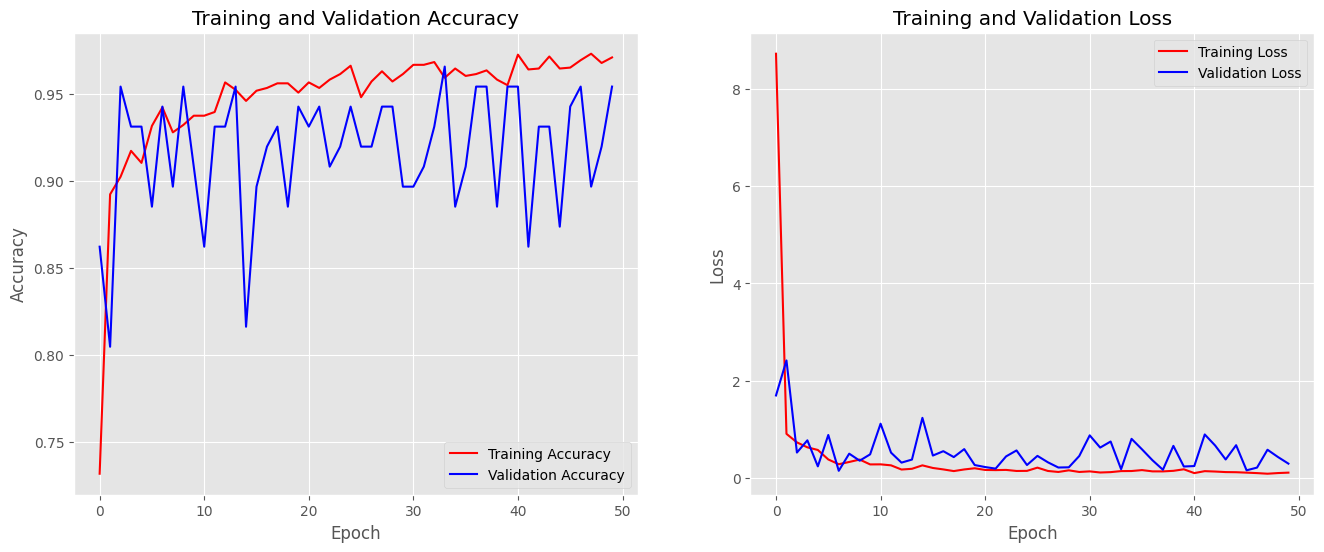

In [ ]:
import matplotlib.pyplot as plt

ResNet50_Model_acc = ResNet50_Model_History.history['accuracy']
ResNet50_Model_val_acc = ResNet50_Model_History.history['val_accuracy']
ResNet50_Model_loss = ResNet50_Model_History.history['loss']
ResNet50_Model_val_loss = ResNet50_Model_History.history['val_loss']
epochs = range(len(ResNet50_Model_acc))

# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Training and Validation Accuracy
ax1.plot(epochs, ResNet50_Model_acc, 'r', label="Training Accuracy")
ax1.plot(epochs, ResNet50_Model_val_acc, 'b', label="Validation Accuracy")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='lower right')

# Plot Training and Validation Loss
ax2.plot(epochs, ResNet50_Model_loss, 'r', label="Training Loss")
ax2.plot(epochs, ResNet50_Model_val_loss, 'b', label="Validation Loss")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')

# Show the subplots
plt.show()


15/15 [==============================] - 147s 10s/step
accuracy score on test data:
 0.9125799573560768
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        84
           1       0.94      0.88      0.91       121
           2       0.93      1.00      0.96       144
           3       1.00      0.84      0.91       120

    accuracy                           0.91       469
   macro avg       0.91      0.91      0.90       469
weighted avg       0.92      0.91      0.91       469



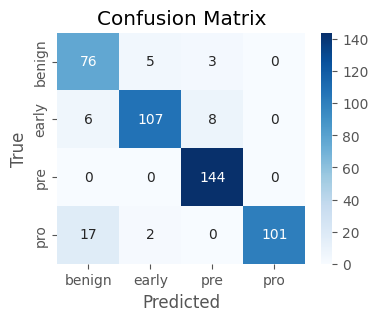

In [ ]:
#Model Performance Evaluation on Test Data
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
result = ResNet50_Model.predict(test_data2)
ResNet50_Model_y_predict = np.array([i.argmax() for i in result])

ResNet101_Model_ac = accuracy_score(y_test,ResNet50_Model_y_predict)
print("accuracy score on test data:\n",ResNet101_Model_ac)

print(classification_report(y_test, ResNet50_Model_y_predict))

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test, ResNet50_Model_y_predict)
# Define class labels for display
class_names = ["benign", "early", "pre", "pro"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ***ResNet101***

In [ ]:
# Model Architecture Define
pretrained_model = tf.keras.applications.ResNet101(
    include_top=False,
    weights="imagenet",
    input_shape=image_size + (3,),
    classes=4,
)
pretrained_model.trainable = False
ResNet101_Model = tf.keras.Sequential([
    layers.RandomRotation(0.3, fill_mode='constant', fill_value=0, input_shape=image_size + (3,)),
    layers.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2),fill_mode='constant', fill_value=0),
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    pretrained_model, layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')])
ResNet101_Model.summary()

171446536/171446536 [==============================] - 9s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_3 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_3 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_6 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_7 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 resnet101 (Functional)      (None, 8, 8, 2048)        42658176  
                                                                 
 flatten_2 (Flatten)         (None, 131072)          

In [ ]:
#Model Creation and Training
ResNet101_Model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])
ResNet101_Model_History = ResNet101_Model.fit(
    pre_trained_data,
    epochs = 40,
    validation_data = pre_trained_validation_data)

Epoch 1/40
59/59 [==============================] - 50s 637ms/step - loss: 0.9587 - accuracy: 0.7795 - val_loss: 0.4079 - val_accuracy: 0.8851
Epoch 2/40
59/59 [==============================] - 16s 257ms/step - loss: 0.2856 - accuracy: 0.9049 - val_loss: 0.4840 - val_accuracy: 0.8736
Epoch 3/40
59/59 [==============================] - 15s 250ms/step - loss: 0.3319 - accuracy: 0.8985 - val_loss: 0.5847 - val_accuracy: 0.8851
Epoch 4/40
59/59 [==============================] - 16s 260ms/step - loss: 0.2201 - accuracy: 0.9245 - val_loss: 0.7636 - val_accuracy: 0.8736
Epoch 5/40
59/59 [==============================] - 15s 248ms/step - loss: 0.1817 - accuracy: 0.9442 - val_loss: 0.4097 - val_accuracy: 0.9080
Epoch 6/40
59/59 [==============================] - 15s 245ms/step - loss: 0.1714 - accuracy: 0.9442 - val_loss: 0.3303 - val_accuracy: 0.9310
Epoch 7/40
59/59 [==============================] - 15s 248ms/step - loss: 0.2076 - accuracy: 0.9352 - val_loss: 0.5123 - val_accuracy: 0.8391

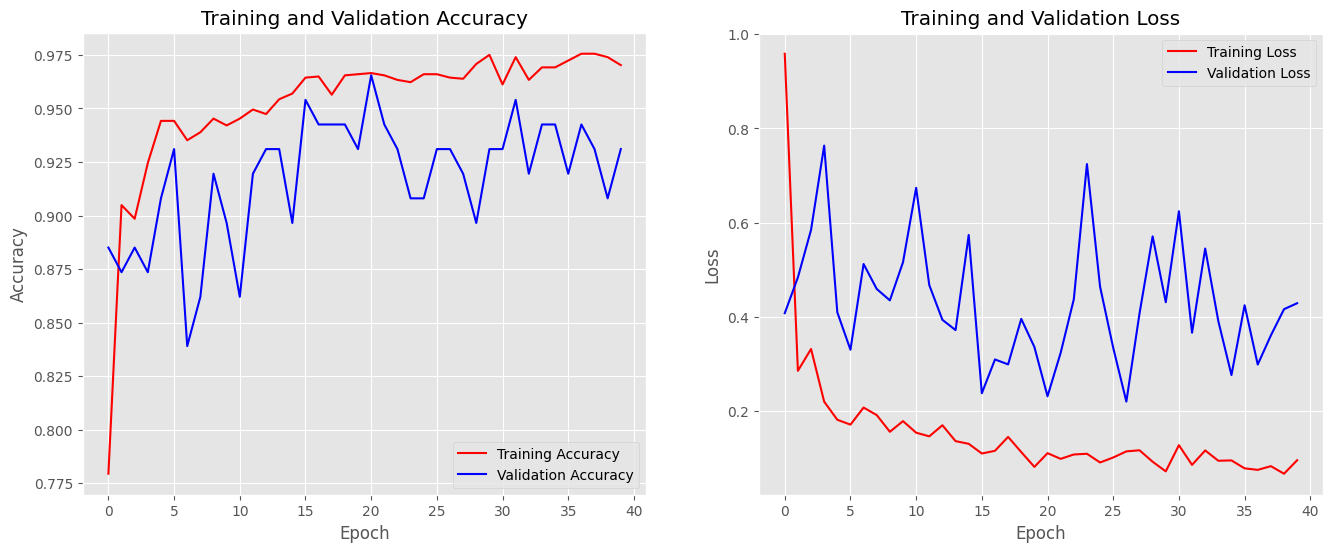

In [ ]:
import matplotlib.pyplot as plt

ResNet101_Model_acc = ResNet101_Model_History.history['accuracy']
ResNet101_Model_val_acc = ResNet101_Model_History.history['val_accuracy']
ResNet101_Model_loss = ResNet101_Model_History.history['loss']
ResNet101_Model_val_loss = ResNet101_Model_History.history['val_loss']
epochs = range(len(ResNet101_Model_acc))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot accuracy curves on the first subplot
ax1.plot(epochs, ResNet101_Model_acc, 'r', label="Training Accuracy")
ax1.plot(epochs, ResNet101_Model_val_acc, 'b', label="Validation Accuracy")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='lower right')

# Plot loss curves on the second subplot
ax2.plot(epochs, ResNet101_Model_loss, 'r', label="Training Loss")
ax2.plot(epochs, ResNet101_Model_val_loss, 'b', label="Validation Loss")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')

# Display the figure with both subplots
plt.show()

15/15 [==============================] - 3s 185ms/step
accuracy score on test data:
 0.9232409381663113
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        84
           1       0.94      0.88      0.91       121
           2       0.93      1.00      0.96       144
           3       1.00      0.88      0.93       120

    accuracy                           0.92       469
   macro avg       0.92      0.92      0.92       469
weighted avg       0.93      0.92      0.92       469



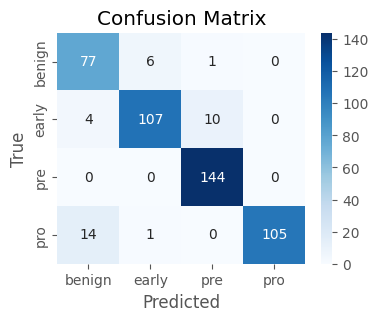

In [ ]:
#Model Performance Evaluation on Test Data
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
result = ResNet101_Model.predict(test_data2)
ResNet101_Model_y_predict = np.array([i.argmax() for i in result])

ResNet101_Model_ac = accuracy_score(y_test,ResNet101_Model_y_predict)
print("accuracy score on test data:\n",ResNet101_Model_ac)

print(classification_report(y_test, ResNet101_Model_y_predict))
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test, ResNet101_Model_y_predict)
# Define class labels for display
class_names = ["benign", "early", "pre", "pro"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ***ResNet152***

In [ ]:
#Model Architecture Define
pretrained_model = tf.keras.applications.ResNet152(
    include_top=False,
    weights="imagenet",
    input_shape=image_size + (3,),
    classes=4,
)
pretrained_model.trainable = False
ResNet152_Model = tf.keras.Sequential([
    layers.RandomRotation(0.3, fill_mode='constant', fill_value=0, input_shape=image_size + (3,)),
    layers.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2),fill_mode='constant', fill_value=0),
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    pretrained_model, layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')])
ResNet152_Model.summary()

234698864/234698864 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_1 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_3 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 resnet152 (Functional)      (None, 8, 8, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 131072)          

In [ ]:
#Model Creation and Training
ResNet152_Model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])
ResNet152_Model_History = ResNet152_Model.fit(
    pre_trained_data,
    epochs = 40,
    validation_data = pre_trained_validation_data)

Epoch 1/40
59/59 [==============================] - 199s 2s/step - loss: 1.0787 - accuracy: 0.8045 - val_loss: 0.8547 - val_accuracy: 0.8276
Epoch 2/40
59/59 [==============================] - 21s 355ms/step - loss: 0.2859 - accuracy: 0.9054 - val_loss: 0.5803 - val_accuracy: 0.8736
Epoch 3/40
59/59 [==============================] - 22s 361ms/step - loss: 0.2977 - accuracy: 0.9267 - val_loss: 0.5409 - val_accuracy: 0.8506
Epoch 4/40
59/59 [==============================] - 21s 348ms/step - loss: 0.3107 - accuracy: 0.9272 - val_loss: 0.7987 - val_accuracy: 0.8046
Epoch 5/40
59/59 [==============================] - 21s 346ms/step - loss: 0.2423 - accuracy: 0.9320 - val_loss: 0.6369 - val_accuracy: 0.8851
Epoch 6/40
59/59 [==============================] - 21s 350ms/step - loss: 0.2197 - accuracy: 0.9410 - val_loss: 0.5352 - val_accuracy: 0.8736
Epoch 7/40
59/59 [==============================] - 22s 359ms/step - loss: 0.1757 - accuracy: 0.9490 - val_loss: 0.5129 - val_accuracy: 0.9195
E

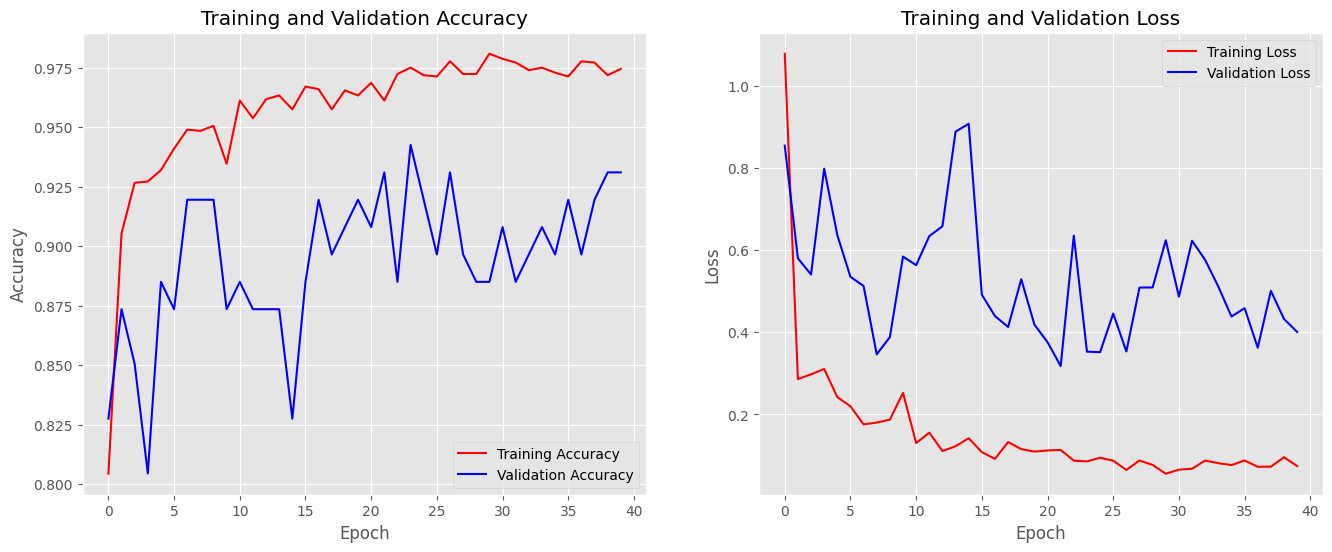

In [ ]:
import matplotlib.pyplot as plt

ResNet152_Model_acc = ResNet152_Model_History.history['accuracy']
ResNet152_Model_val_acc = ResNet152_Model_History.history['val_accuracy']
ResNet152_Model_loss = ResNet152_Model_History.history['loss']
ResNet152_Model_val_loss = ResNet152_Model_History.history['val_loss']
epochs = range(len(ResNet152_Model_acc))

# Create a single figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Training and Validation Accuracy
ax1.plot(epochs, ResNet152_Model_acc, 'r', label="Training Accuracy")
ax1.plot(epochs, ResNet152_Model_val_acc, 'b', label="Validation Accuracy")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='lower right')

# Plot Training and Validation Loss
ax2.plot(epochs, ResNet152_Model_loss, 'r', label="Training Loss")
ax2.plot(epochs, ResNet152_Model_val_loss, 'b', label="Validation Loss")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')

plt.show()


15/15 [==============================] - 63s 4s/step
accuracy score on test data:
 0.9168443496801706
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        84
           1       0.87      0.90      0.88       121
           2       0.92      1.00      0.96       144
           3       0.98      0.94      0.96       120

    accuracy                           0.92       469
   macro avg       0.91      0.90      0.91       469
weighted avg       0.92      0.92      0.92       469



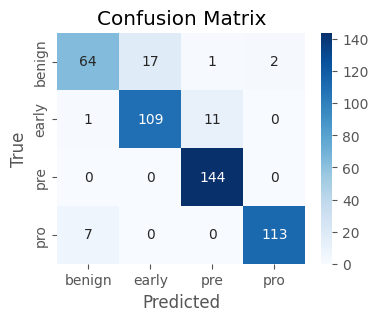

In [ ]:
#Model Performance Evaluation on Test Data
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

result = ResNet152_Model.predict(test_data2)
ResNet152_Model_y_predict = np.array([i.argmax() for i in result])

ResNet152_Model_ac = accuracy_score(y_test, ResNet152_Model_y_predict)
print("accuracy score on test data:\n", ResNet152_Model_ac)
print(classification_report(y_test, ResNet152_Model_y_predict))

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test, ResNet152_Model_y_predict)
# Define class labels for display
class_names = ["benign", "early", "pre", "pro"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ***VGG16***

In [ ]:
#Model Architecture Define
pretrained_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=image_size + (3,),
    classes=4,
    classifier_activation="softmax",
)
pretrained_model.trainable = False
VGG16_Model = tf.keras.Sequential([
    layers.RandomRotation(0.3, fill_mode='constant', fill_value=0, input_shape=image_size + (3,)),
    layers.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2),fill_mode='constant', fill_value=0),
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    pretrained_model, layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')])
VGG16_Model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_2 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_4 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_5 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             

In [ ]:
#Model Creation and Training
VGG16_Model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])
VGG16_Model_History = VGG16_Model.fit(
    pre_trained_data,
    epochs = 30,
    validation_data = pre_trained_validation_data)

Epoch 1/30
59/59 [==============================] - 29s 363ms/step - loss: 1.6620 - accuracy: 0.7402 - val_loss: 0.9589 - val_accuracy: 0.7701
Epoch 2/30
59/59 [==============================] - 13s 210ms/step - loss: 0.5471 - accuracy: 0.8650 - val_loss: 0.4536 - val_accuracy: 0.8736
Epoch 3/30
59/59 [==============================] - 12s 198ms/step - loss: 0.3488 - accuracy: 0.9012 - val_loss: 0.6467 - val_accuracy: 0.8276
Epoch 4/30
59/59 [==============================] - 13s 208ms/step - loss: 0.3444 - accuracy: 0.9070 - val_loss: 0.6813 - val_accuracy: 0.8736
Epoch 5/30
59/59 [==============================] - 12s 188ms/step - loss: 0.2730 - accuracy: 0.9235 - val_loss: 0.7371 - val_accuracy: 0.8506
Epoch 6/30
59/59 [==============================] - 13s 204ms/step - loss: 0.2726 - accuracy: 0.9235 - val_loss: 0.9792 - val_accuracy: 0.8621
Epoch 7/30
59/59 [==============================] - 12s 193ms/step - loss: 0.2634 - accuracy: 0.9245 - val_loss: 1.2190 - val_accuracy: 0.8276

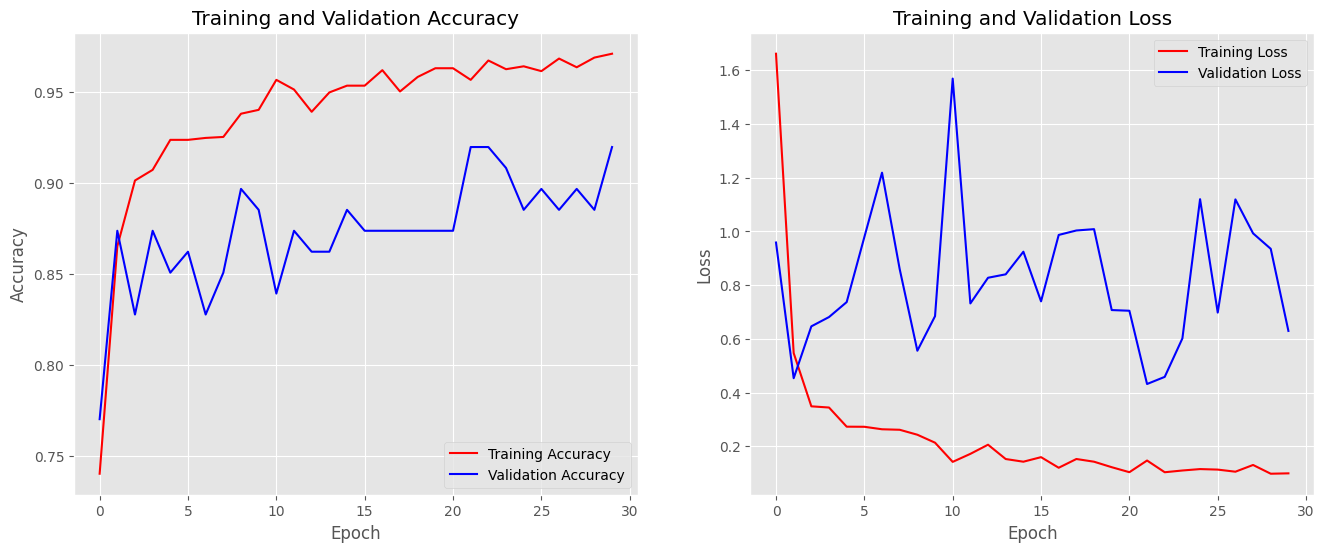

In [ ]:
#Accuracy and Loss Curves
import matplotlib.pyplot as plt

VGG16_Model_acc = VGG16_Model_History.history['accuracy']
VGG16_Model_val_acc = VGG16_Model_History.history['val_accuracy']
VGG16_Model_loss = VGG16_Model_History.history['loss']
VGG16_Model_val_loss = VGG16_Model_History.history['val_loss']
epochs = range(len(VGG16_Model_acc))

# Create a single figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Training and Validation Accuracy
ax1.plot(epochs, VGG16_Model_acc, 'r', label="Training Accuracy")
ax1.plot(epochs, VGG16_Model_val_acc, 'b', label="Validation Accuracy")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='lower right')

# Plot Training and Validation Loss
ax2.plot(epochs, VGG16_Model_loss, 'r', label="Training Loss")
ax2.plot(epochs, VGG16_Model_val_loss, 'b', label="Validation Loss")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')

plt.show()


15/15 [==============================] - 7s 460ms/step
accuracy score on test data:
 0.9253731343283582
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        84
           1       0.91      0.94      0.93       121
           2       0.96      1.00      0.98       144
           3       1.00      0.86      0.92       120

    accuracy                           0.93       469
   macro avg       0.92      0.92      0.92       469
weighted avg       0.93      0.93      0.93       469



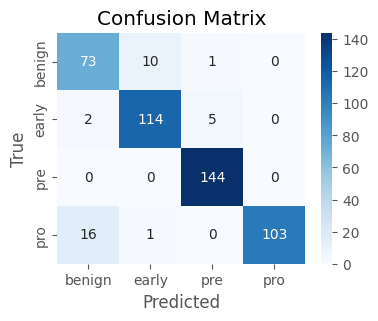

In [ ]:
#Model Performance Evaluation on Test Data

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

result = VGG16_Model.predict(test_data2)
VGG16_Model_y_predict = np.array([i.argmax() for i in result])
VGG16_Model_ac = accuracy_score(y_test,VGG16_Model_y_predict)

print("accuracy score on test data:\n",VGG16_Model_ac)

print(classification_report(y_test, VGG16_Model_y_predict))

VGG16_Model_cm = confusion_matrix(y_test, VGG16_Model_y_predict)
# Replace "InceptionResNetV2_Model_cm" and "y_test" with your confusion matrix and true labels

# Define class names (if you have specific class names)
class_names = ["benign", "early", "pre", "pro"]

# Create the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(VGG16_Model_cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# **VGG19**

In [ ]:
#Model Architecture Define
pretrained_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=image_size + (3,),
    classes=4,
    classifier_activation="softmax",
)
pretrained_model.trainable = False
VGG19_Model = tf.keras.Sequential([
    layers.RandomRotation(0.3, fill_mode='constant', fill_value=0, input_shape=image_size + (3,)),
    layers.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2),fill_mode='constant', fill_value=0),
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    pretrained_model, layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(224, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')])
VGG19_Model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_8 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_8 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_16 (RandomFlip  (None, 256, 256, 3)       0         
 )                                                               
                                                                 
 random_flip_17 (RandomFlip  (None, 256, 256, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                      

In [ ]:
#Model Creation and Training
VGG19_Model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])
VGG19_Model_History = VGG19_Model.fit(
    pre_trained_data,
    epochs = 30,
    validation_data = pre_trained_validation_data)

Epoch 1/30
59/59 [==============================] - 13s 180ms/step - loss: 0.4602 - accuracy: 0.8948 - val_loss: 0.8787 - val_accuracy: 0.8621
Epoch 2/30
59/59 [==============================] - 11s 180ms/step - loss: 0.4765 - accuracy: 0.9091 - val_loss: 1.0683 - val_accuracy: 0.8276
Epoch 3/30
59/59 [==============================] - 12s 188ms/step - loss: 0.2592 - accuracy: 0.9336 - val_loss: 0.9846 - val_accuracy: 0.8506
Epoch 4/30
59/59 [==============================] - 11s 176ms/step - loss: 0.4428 - accuracy: 0.9129 - val_loss: 0.6498 - val_accuracy: 0.8966
Epoch 5/30
59/59 [==============================] - 12s 188ms/step - loss: 0.3718 - accuracy: 0.9176 - val_loss: 0.5212 - val_accuracy: 0.9080
Epoch 6/30
59/59 [==============================] - 11s 180ms/step - loss: 0.2614 - accuracy: 0.9299 - val_loss: 1.1079 - val_accuracy: 0.8851
Epoch 7/30
59/59 [==============================] - 11s 180ms/step - loss: 0.2257 - accuracy: 0.9474 - val_loss: 0.9854 - val_accuracy: 0.8621

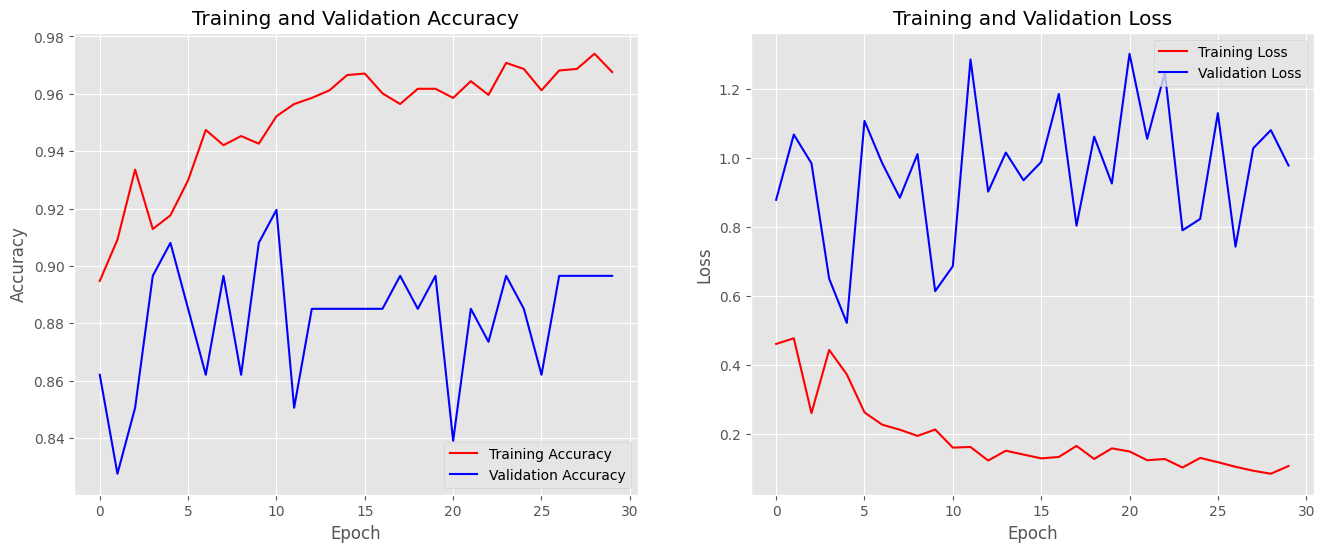

In [ ]:
import matplotlib.pyplot as plt

VGG19_Model_acc = VGG19_Model_History.history['accuracy']
VGG19_Model_val_acc = VGG19_Model_History.history['val_accuracy']
VGG19_Model_loss = VGG19_Model_History.history['loss']
VGG19_Model_val_loss = VGG19_Model_History.history['val_loss']
epochs = range(len(VGG19_Model_acc))

# Create a single figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Training and Validation Accuracy
ax1.plot(epochs, VGG19_Model_acc, 'r', label="Training Accuracy")
ax1.plot(epochs, VGG19_Model_val_acc, 'b', label="Validation Accuracy")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='lower right')

# Plot Training and Validation Loss
ax2.plot(epochs, VGG19_Model_loss, 'r', label="Training Loss")
ax2.plot(epochs, VGG19_Model_val_loss, 'b', label="Validation Loss")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')

plt.show()


15/15 [==============================] - 2s 154ms/step
accuracy score on test data:
 0.8656716417910447
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        84
           1       0.81      0.92      0.86       121
           2       0.93      1.00      0.96       144
           3       1.00      0.72      0.83       120

    accuracy                           0.87       469
   macro avg       0.86      0.85      0.85       469
weighted avg       0.88      0.87      0.86       469



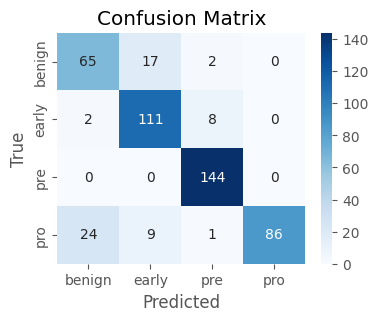

In [ ]:
#Model Performance Evaluation on Test Data
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

result = VGG19_Model.predict(test_data2)
VGG19_Model_y_predict = np.array([i.argmax() for i in result])

VGG19_Model_cm = confusion_matrix(y_test, VGG19_Model_y_predict)
VGG19_Model_ac = accuracy_score(y_test,VGG19_Model_y_predict)

print("accuracy score on test data:\n",VGG19_Model_ac)

print(classification_report(y_test, VGG19_Model_y_predict))
VGG19_Model_cm = confusion_matrix(y_test, VGG19_Model_y_predict)

# Define class names (if you have specific class names)
class_names = ["benign", "early", "pre", "pro"]  # Replace with your class names

# Create the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(VGG19_Model_cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ***AlexNet***

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Define the AlexNet model architecture
AlexNet_Model = keras.Sequential([
    keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Conv2D(256, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Conv2D(384, (3, 3), activation='relu'),
    keras.layers.Conv2D(384, (3, 3), activation='relu'),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

# Model compilation
AlexNet_Model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

# Training the model
AlexNet_Model_History = AlexNet_Model.fit(
    pre_trained_data,
    epochs=50,
    validation_data=pre_trained_validation_data
)



Epoch 1/50
59/59 [==============================] - 8s 96ms/step - loss: 2.0030 - accuracy: 0.5096 - val_loss: 0.9075 - val_accuracy: 0.5977
Epoch 2/50
59/59 [==============================] - 7s 100ms/step - loss: 0.7869 - accuracy: 0.6706 - val_loss: 0.6185 - val_accuracy: 0.7586
Epoch 3/50
59/59 [==============================] - 5s 75ms/step - loss: 0.6253 - accuracy: 0.7460 - val_loss: 0.5086 - val_accuracy: 0.8276
Epoch 4/50
59/59 [==============================] - 6s 87ms/step - loss: 0.5886 - accuracy: 0.7556 - val_loss: 0.5899 - val_accuracy: 0.8506
Epoch 5/50
59/59 [==============================] - 5s 76ms/step - loss: 0.4386 - accuracy: 0.8326 - val_loss: 0.7864 - val_accuracy: 0.8046
Epoch 6/50
59/59 [==============================] - 5s 74ms/step - loss: 0.3686 - accuracy: 0.8549 - val_loss: 0.4903 - val_accuracy: 0.8506
Epoch 7/50
59/59 [==============================] - 6s 99ms/step - loss: 0.2879 - accuracy: 0.8836 - val_loss: 0.6115 - val_accuracy: 0.8276
Epoch 8/50
5

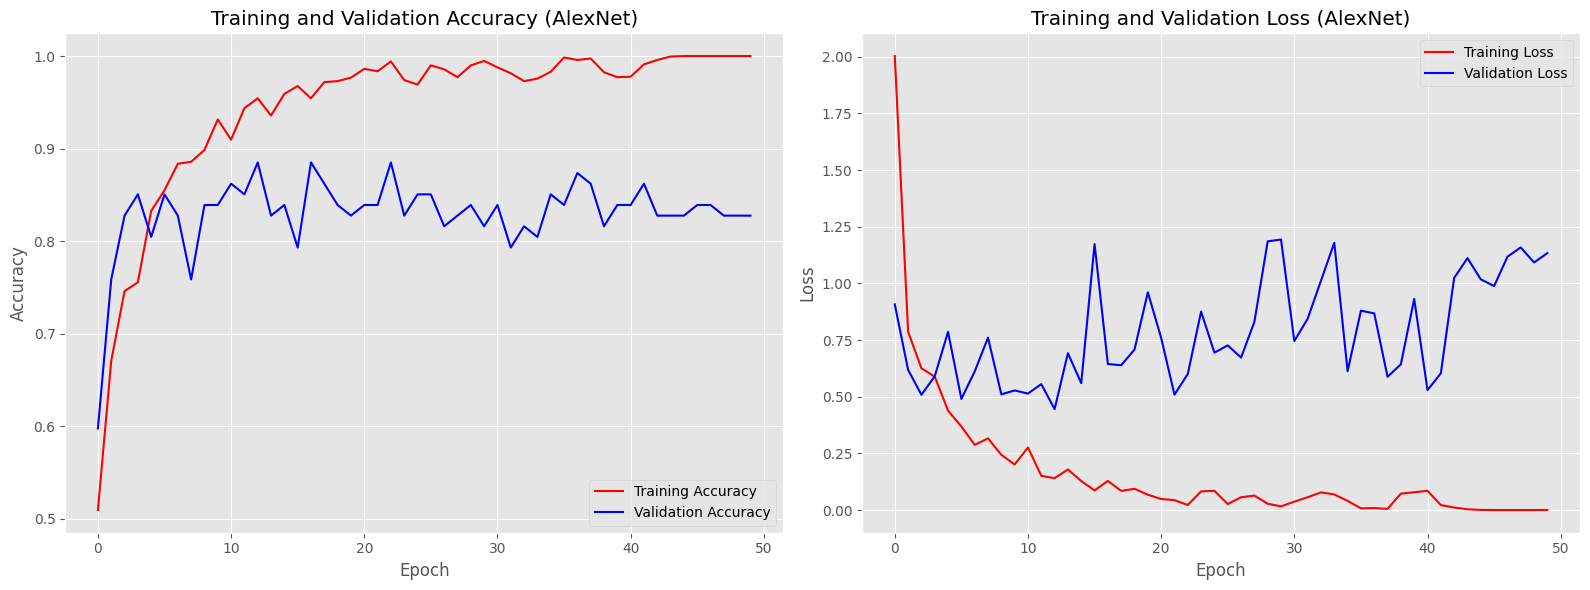

In [ ]:
#Accuracy and Loss Curves
import matplotlib.pyplot as plt

AlexNet_Model_acc = AlexNet_Model_History.history['accuracy']
AlexNet_Model_val_acc = AlexNet_Model_History.history['val_accuracy']
AlexNet_Model_loss = AlexNet_Model_History.history['loss']
AlexNet_Model_val_loss = AlexNet_Model_History.history['val_loss']
epochs = range(len(AlexNet_Model_acc))

# Create a 1x2 grid for subplots
plt.figure(figsize=(16, 6))

# Subplot 1: Accuracy curves
plt.subplot(1, 2, 1)
plt.plot(epochs, AlexNet_Model_acc, 'r', label="Training Accuracy")
plt.plot(epochs, AlexNet_Model_val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (AlexNet)')
plt.legend(loc='lower right')

# Subplot 2: Loss curves
plt.subplot(1, 2, 2)
plt.plot(epochs, AlexNet_Model_loss, 'r', label="Training Loss")
plt.plot(epochs, AlexNet_Model_val_loss, 'b', label="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (AlexNet)')
plt.legend(loc='upper right')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the figure with both subplots
plt.show()


15/15 [==============================] - 1s 65ms/step
Accuracy score on test data:
 0.8742004264392325
              precision    recall  f1-score   support

           0       0.84      0.68      0.75        84
           1       0.81      0.83      0.82       121
           2       0.87      0.98      0.92       144
           3       0.97      0.93      0.94       120

    accuracy                           0.87       469
   macro avg       0.87      0.85      0.86       469
weighted avg       0.87      0.87      0.87       469



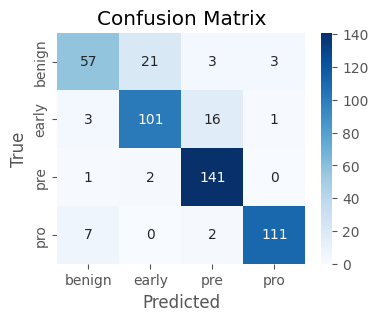

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using the AlexNet model
result = AlexNet_Model.predict(test_data2)
AlexNet_Model_y_predict = np.array([i.argmax() for i in result])

AlexNet_Model_ac = accuracy_score(y_test, AlexNet_Model_y_predict)
print("Accuracy score on test data:\n", AlexNet_Model_ac)

print(classification_report(y_test, AlexNet_Model_y_predict))

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test, AlexNet_Model_y_predict)
# Define class labels for display
class_names =  ["benign", "early", "pre", "pro"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ***Xception***

In [ ]:
pretrained_model = tf.keras.applications.Xception(
        weights='imagenet',
        include_top=False ,
        input_shape=image_size + (3,))
pretrained_model.trainable = False
Xception_Model = tf.keras.Sequential([
    layers.RandomRotation(0.3, fill_mode='constant', fill_value=0, input_shape=image_size + (3,)),
    layers.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2),fill_mode='constant', fill_value=0),
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    pretrained_model, layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')])
Xception_Model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_2 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_4 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_5 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            

In [ ]:
Xception_Model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])
Xception_Model_History = Xception_Model.fit(
    pre_trained_data,
    epochs = 40,
    validation_data = pre_trained_validation_data)

Epoch 1/40
59/59 [==============================] - 16s 201ms/step - loss: 1.9286 - accuracy: 0.8002 - val_loss: 5.3839 - val_accuracy: 0.7356
Epoch 2/40
59/59 [==============================] - 11s 187ms/step - loss: 1.0895 - accuracy: 0.8183 - val_loss: 2.8791 - val_accuracy: 0.7931
Epoch 3/40
59/59 [==============================] - 12s 189ms/step - loss: 1.0258 - accuracy: 0.8061 - val_loss: 3.7004 - val_accuracy: 0.7471
Epoch 4/40
59/59 [==============================] - 12s 191ms/step - loss: 1.1848 - accuracy: 0.8087 - val_loss: 3.7161 - val_accuracy: 0.7241
Epoch 5/40
59/59 [==============================] - 12s 186ms/step - loss: 1.3884 - accuracy: 0.7896 - val_loss: 5.4897 - val_accuracy: 0.7356
Epoch 6/40
59/59 [==============================] - 12s 189ms/step - loss: 0.9315 - accuracy: 0.8199 - val_loss: 1.8477 - val_accuracy: 0.8506
Epoch 7/40
59/59 [==============================] - 12s 191ms/step - loss: 0.8982 - accuracy: 0.8103 - val_loss: 4.5259 - val_accuracy: 0.7471

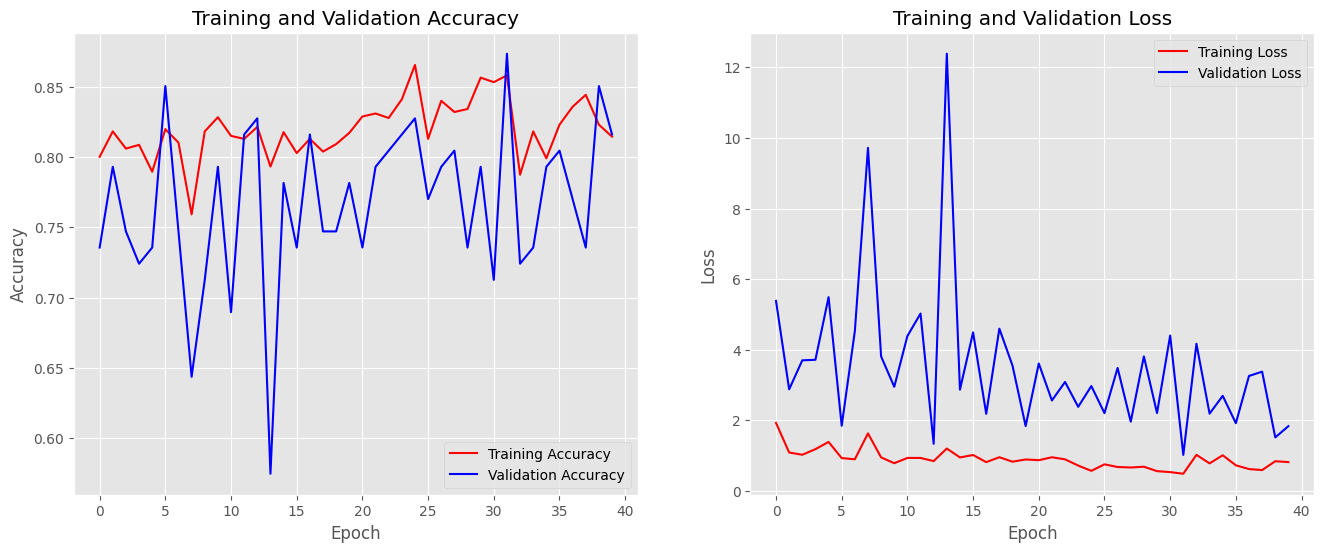

In [ ]:
#Accuracy and Loss Curves
import matplotlib.pyplot as plt
Xception_Model_acc = Xception_Model_History.history['accuracy']
Xception_Model_val_acc = Xception_Model_History.history['val_accuracy']
Xception_Model_loss = Xception_Model_History.history['loss']
Xception_Model_val_loss = Xception_Model_History.history['val_loss']
epochs = range(len(Xception_Model_acc))

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Training and Validation Accuracy
ax1.plot(epochs, Xception_Model_acc, 'r', label="Training Accuracy")
ax1.plot(epochs, Xception_Model_val_acc, 'b', label="Validation Accuracy")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='lower right')

# Plot Training and Validation Loss
ax2.plot(epochs, Xception_Model_loss, 'r', label="Training Loss")
ax2.plot(epochs, Xception_Model_val_loss, 'b', label="Validation Loss")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')

plt.show()


15/15 [==============================] - 4s 239ms/step
accuracy score on test data:
 0.7718550106609808
              precision    recall  f1-score   support

           0       0.67      0.58      0.62        84
           1       0.68      0.56      0.62       121
           2       0.75      1.00      0.85       144
           3       0.98      0.84      0.91       120

    accuracy                           0.77       469
   macro avg       0.77      0.75      0.75       469
weighted avg       0.78      0.77      0.76       469



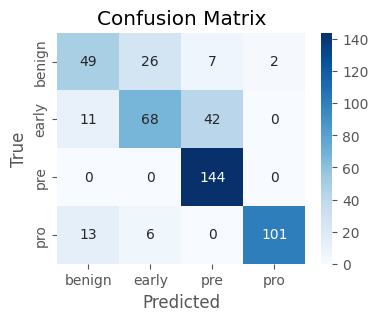

In [ ]:
#Model Performance Evaluation on Test Data

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

result = Xception_Model.predict(test_data2)
Xception_Model_y_predict = np.array([i.argmax() for i in result])
Xception_Model_ac = accuracy_score(y_test,Xception_Model_y_predict)

print("accuracy score on test data:\n",Xception_Model_ac)
print(classification_report(y_test, Xception_Model_y_predict))

Xception_Model_cm = confusion_matrix(y_test, Xception_Model_y_predict)

# Define class names
class_names = ["benign", "early", "pre", "pro"]
# Create the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(Xception_Model_cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ***InceptionV3***

In [ ]:
#Model Architecture Define
pretrained_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=image_size + (3,),
    classes=4,
    classifier_activation="softmax",
)
pretrained_model.trainable = False
InceptionV3_Model = tf.keras.Sequential([
    layers.RandomRotation(0.3, fill_mode='constant', fill_value=0, input_shape=image_size + (3,)),
    layers.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2),fill_mode='constant', fill_value=0),
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    pretrained_model, layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')])
InceptionV3_Model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_4 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_4 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_8 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_9 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 73728)             

In [ ]:
#Model Creation and Training
InceptionV3_Model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])
InceptionV3_Model_History = InceptionV3_Model.fit(
    pre_trained_data,
    epochs = 40,
    validation_data = pre_trained_validation_data)

Epoch 1/40
59/59 [==============================] - 21s 221ms/step - loss: 27.1877 - accuracy: 0.6270 - val_loss: 7.2203 - val_accuracy: 0.7126
Epoch 2/40
59/59 [==============================] - 8s 123ms/step - loss: 6.6218 - accuracy: 0.7168 - val_loss: 5.6274 - val_accuracy: 0.7356
Epoch 3/40
59/59 [==============================] - 7s 113ms/step - loss: 4.4424 - accuracy: 0.7396 - val_loss: 10.9506 - val_accuracy: 0.6207
Epoch 4/40
59/59 [==============================] - 8s 126ms/step - loss: 5.0048 - accuracy: 0.7253 - val_loss: 11.8428 - val_accuracy: 0.6667
Epoch 5/40
59/59 [==============================] - 8s 123ms/step - loss: 5.1442 - accuracy: 0.7439 - val_loss: 6.8831 - val_accuracy: 0.6667
Epoch 6/40
59/59 [==============================] - 7s 117ms/step - loss: 4.6949 - accuracy: 0.7556 - val_loss: 6.8099 - val_accuracy: 0.6897
Epoch 7/40
59/59 [==============================] - 8s 126ms/step - loss: 2.8841 - accuracy: 0.7848 - val_loss: 8.8031 - val_accuracy: 0.6207
Ep

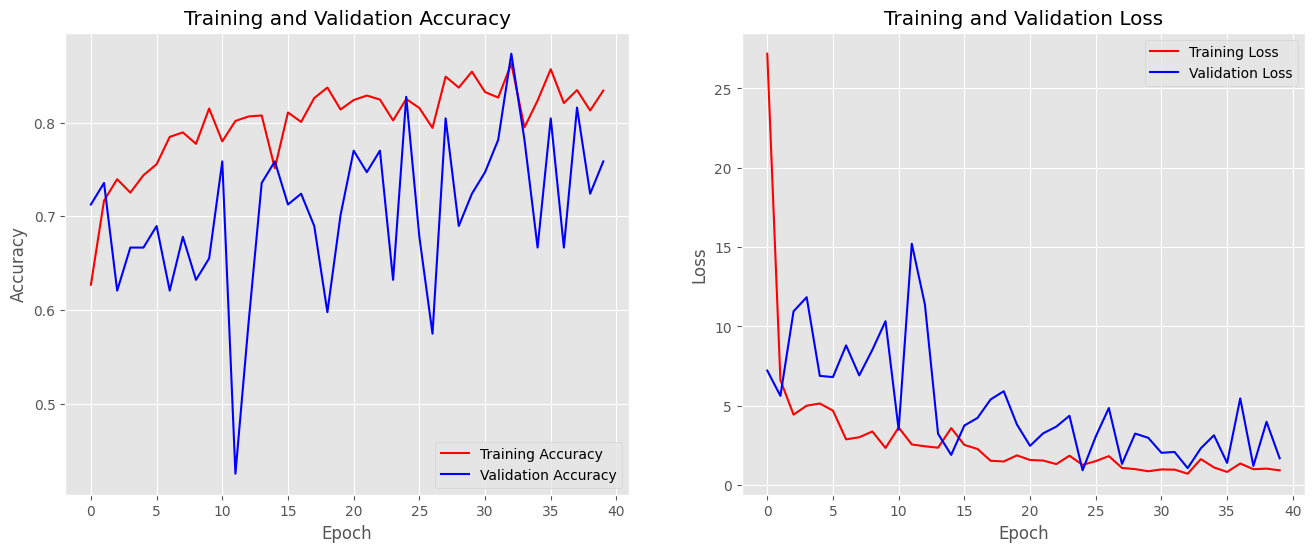

In [ ]:
#Accuracy and Loss Curves
import matplotlib.pyplot as plt
InceptionV3_Model_acc = InceptionV3_Model_History.history['accuracy']
InceptionV3_Model_val_acc = InceptionV3_Model_History.history['val_accuracy']
InceptionV3_Model_loss = InceptionV3_Model_History.history['loss']
InceptionV3_Model_val_loss = InceptionV3_Model_History.history['val_loss']
epochs = range(len(InceptionV3_Model_acc))

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot accuracy curves
ax1.plot(epochs, InceptionV3_Model_acc, 'r', label="Training Accuracy")
ax1.plot(epochs, InceptionV3_Model_val_acc, 'b', label="Validation Accuracy")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='lower right')

# Plot loss curves
ax2.plot(epochs, InceptionV3_Model_loss, 'r', label="Training Loss")
ax2.plot(epochs, InceptionV3_Model_val_loss, 'b', label="Validation Loss")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')

plt.show()


15/15 [==============================] - 4s 220ms/step
accuracy score on test data:
 0.7995735607675906
              precision    recall  f1-score   support

           0       0.58      0.73      0.65        84
           1       0.74      0.77      0.75       121
           2       0.89      0.94      0.92       144
           3       0.99      0.71      0.83       120

    accuracy                           0.80       469
   macro avg       0.80      0.79      0.79       469
weighted avg       0.82      0.80      0.80       469



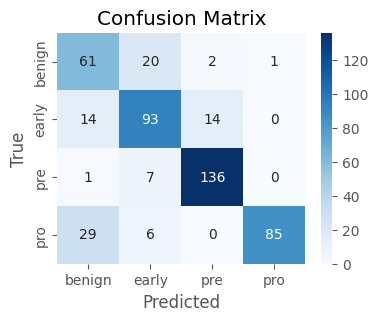

In [ ]:
#Model Performance Evaluation on Test Data
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

result = InceptionV3_Model.predict(test_data2)
InceptionV3_Model_y_predict = np.array([i.argmax() for i in result])

InceptionV3_Model_cm = confusion_matrix(y_test, InceptionV3_Model_y_predict)
InceptionV3_Model_ac = accuracy_score(y_test,InceptionV3_Model_y_predict)

print("accuracy score on test data:\n",InceptionV3_Model_ac)

print(classification_report(y_test, InceptionV3_Model_y_predict))

class_names = ["benign", "early", "pre", "pro"]

# Create the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(InceptionV3_Model_cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# ***InceptionResNetV2***

In [ ]:
#Model Architecture Define
pretrained_model = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=image_size + (3,),
    classes=4,
    classifier_activation="softmax",
)
pretrained_model.trainable = False
InceptionResNetV2_Model = tf.keras.Sequential([
    layers.RandomRotation(0.3, fill_mode='constant', fill_value=0, input_shape=image_size + (3,)),
    layers.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2),fill_mode='constant', fill_value=0),
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    pretrained_model, layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')])
InceptionResNetV2_Model.summary()

219055592/219055592 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_1 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_flip_3 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 inception_resnet_v2 (Funct  (None, 6, 6, 1536)        54336736  
 ional)                                                          
                                                     

In [ ]:
#Model Creation and Training
InceptionResNetV2_Model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])
InceptionResNetV2_Model_History = InceptionResNetV2_Model.fit(
    pre_trained_data,
    epochs = 40,
    validation_data = pre_trained_validation_data)

Epoch 1/40
59/59 [==============================] - 43s 421ms/step - loss: 21.9072 - accuracy: 0.4601 - val_loss: 15.6925 - val_accuracy: 0.3448
Epoch 2/40
59/59 [==============================] - 15s 250ms/step - loss: 8.0689 - accuracy: 0.5478 - val_loss: 8.7218 - val_accuracy: 0.3908
Epoch 3/40
59/59 [==============================] - 15s 241ms/step - loss: 10.4875 - accuracy: 0.5117 - val_loss: 8.2644 - val_accuracy: 0.4943
Epoch 4/40
59/59 [==============================] - 15s 251ms/step - loss: 15.8061 - accuracy: 0.4511 - val_loss: 36.5255 - val_accuracy: 0.3333
Epoch 5/40
59/59 [==============================] - 15s 241ms/step - loss: 15.1647 - accuracy: 0.4644 - val_loss: 22.1170 - val_accuracy: 0.2989
Epoch 6/40
59/59 [==============================] - 15s 250ms/step - loss: 7.0491 - accuracy: 0.5457 - val_loss: 11.9153 - val_accuracy: 0.4138
Epoch 7/40
59/59 [==============================] - 15s 242ms/step - loss: 5.8977 - accuracy: 0.5648 - val_loss: 20.1443 - val_accurac

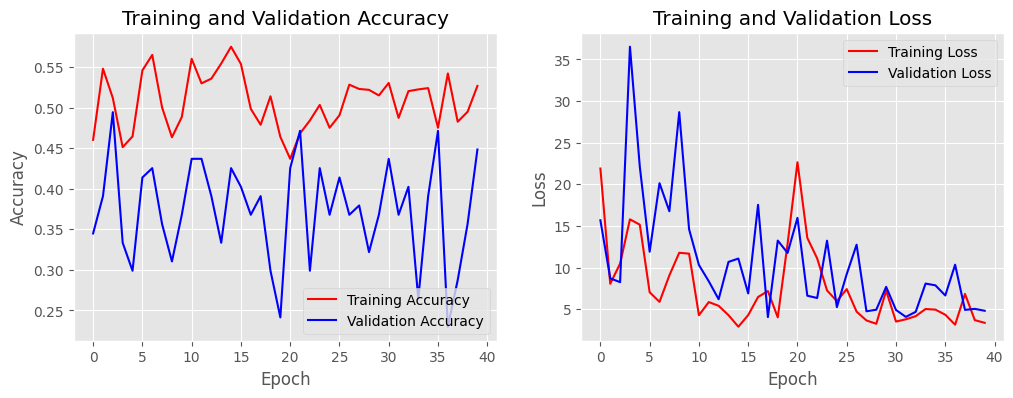

In [ ]:
#Accuracy and Loss Curves
import matplotlib.pyplot as plt
InceptionResNetV2_Model_acc = InceptionResNetV2_Model_History.history['accuracy']
InceptionResNetV2_Model_val_acc = InceptionResNetV2_Model_History.history['val_accuracy']
InceptionResNetV2_Model_loss = InceptionResNetV2_Model_History.history['loss']
InceptionResNetV2_Model_val_loss = InceptionResNetV2_Model_History.history['val_loss']
epochs = range(len(InceptionResNetV2_Model_acc))

# Create subplots with two figures side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot Training and Validation Accuracy
ax1.plot(epochs, InceptionResNetV2_Model_acc, 'r', label="Training Accuracy")
ax1.plot(epochs, InceptionResNetV2_Model_val_acc, 'b', label="Validation Accuracy")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='lower right')

# Plot Training and Validation Loss
ax2.plot(epochs, InceptionResNetV2_Model_loss, 'r', label="Training Loss")
ax2.plot(epochs, InceptionResNetV2_Model_val_loss, 'b', label="Validation Loss")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')

# Show the subplots
plt.show()


15/15 [==============================] - 6s 204ms/step
accuracy score on test data:
 0.4520255863539446
              precision    recall  f1-score   support

           0       0.28      0.23      0.25        84
           1       0.34      0.72      0.47       121
           2       0.63      0.46      0.53       144
           3       0.91      0.33      0.49       120

    accuracy                           0.45       469
   macro avg       0.54      0.43      0.43       469
weighted avg       0.57      0.45      0.45       469



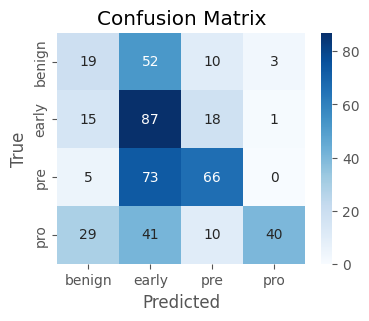

In [ ]:
#Model Performance Evaluation on Test Data
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
result = InceptionResNetV2_Model.predict(test_data2)
InceptionResNetV2_Model_y_predict = np.array([i.argmax() for i in result])

InceptionResNetV2_Model_cm = confusion_matrix(y_test, InceptionResNetV2_Model_y_predict)
InceptionResNetV2_Model_ac = accuracy_score(y_test,InceptionResNetV2_Model_y_predict)
print("accuracy score on test data:\n",InceptionResNetV2_Model_ac)

print(classification_report(y_test, InceptionResNetV2_Model_y_predict))
class_names = ["benign", "early", "pre", "pro"]

# Create the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(InceptionResNetV2_Model_cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



# ***Comparing Pre-Trained Models***

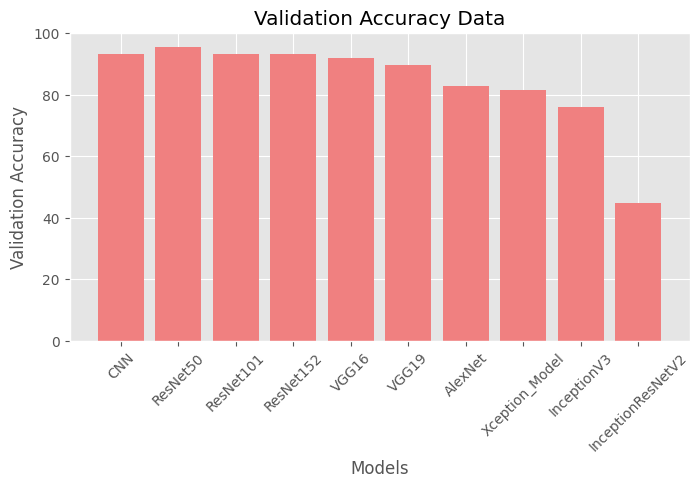

In [ ]:
import matplotlib.pyplot as plt

#Validation  Accuracy data

models = ["CNN", "ResNet50", "ResNet101", "ResNet152", "VGG16", "VGG19", "AlexNet", "Xception_Model", "InceptionV3", "InceptionResNetV2"]
val_acc = [93.10,95.40,93.10,93.10,91.95,89.66,82.76,81.61,75.86,44.83]
plt.figure(figsize=(8,4 ))
plt.bar(models, val_acc, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Data')
plt.xticks(rotation=45)
plt.show()


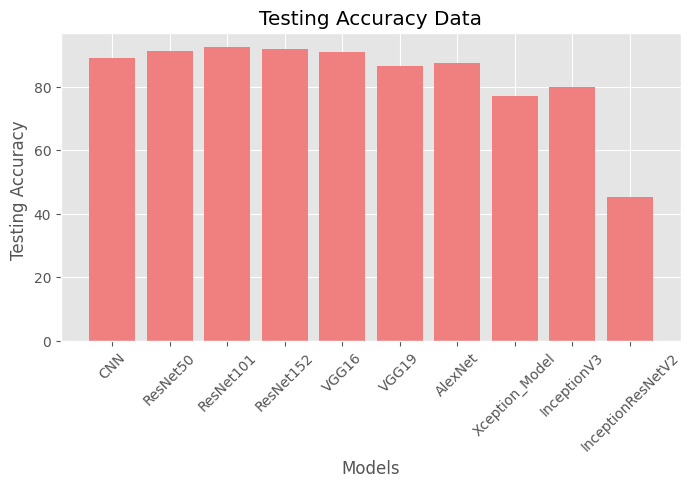

In [ ]:
# Testing Accuracy Data
models = ["CNN", "ResNet50", "ResNet101", "ResNet152", "VGG16", "VGG19", "AlexNet", "Xception_Model", "InceptionV3", "InceptionResNetV2"]
testing_acc =[89.12, 91.25, 92.32, 91.68, 90.83, 86.56, 87.42, 77.18, 79.95, 45.20]
plt.figure(figsize=(8,4 ))
plt.bar(models, testing_acc, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('Testing Accuracy ')
plt.title('Testing Accuracy Data')
plt.xticks(rotation=45)
plt.show()

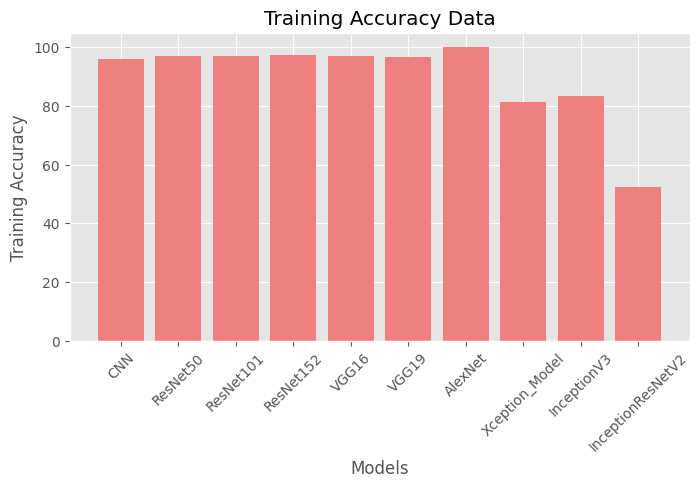

In [ ]:
#Training Accuracy Data'
models = ["CNN", "ResNet50", "ResNet101", "ResNet152", "VGG16", "VGG19", "AlexNet" , "Xception_Model", "InceptionV3", "InceptionResNetV2"]
train_acc =[96.12, 97.08, 97.02, 97.45, 97.08, 96.76, 100.0 , 81.46, 83.42,52.26]
plt.figure(figsize=(8,4 ))
plt.bar(models, train_acc, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Data')
plt.xticks(rotation=45)
plt.show()

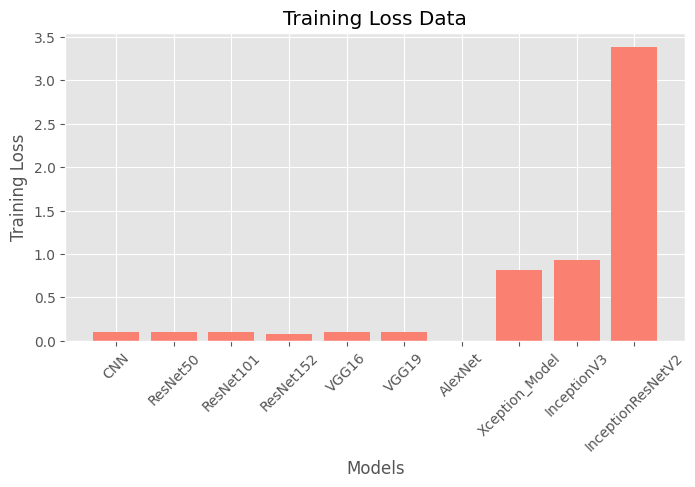

In [ ]:
#Training Loss Data
models = ["CNN", "ResNet50", "ResNet101", "ResNet152", "VGG16", "VGG19", "AlexNet" , "Xception_Model", "InceptionV3", "InceptionResNetV2"]
training_loss =[0.1025, 0.1050, 0.0958,0.0741 , 0.0992 , 0.1056, 1.6338e-04 , 0.8177, 0.9296, 3.3800]
plt.figure(figsize=(8,4 ))
plt.bar(models, training_loss, color='salmon')
plt.xlabel('Models')
plt.ylabel('Training Loss')
plt.title('Training Loss Data')
plt.xticks(rotation=45)
plt.show()

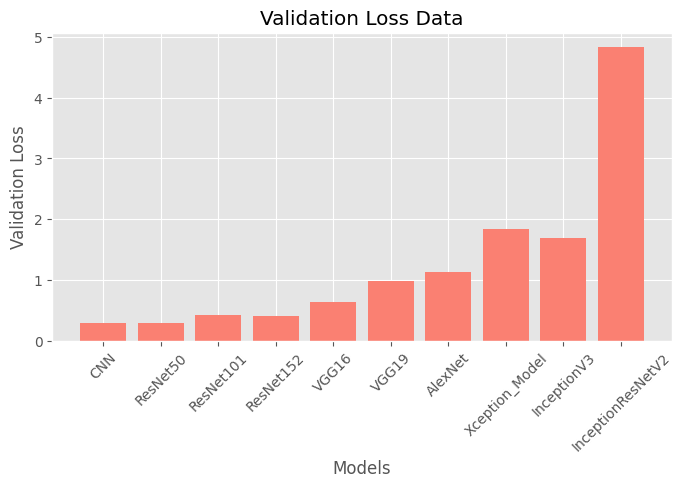

In [ ]:
# Validation Loss Data
models = ["CNN", "ResNet50", "ResNet101", "ResNet152", "VGG16", "VGG19", "AlexNet" , "Xception_Model", "InceptionV3", "InceptionResNetV2"]
Validation_loss =[0.2888, 0.2905, 0.4291, 0.4010, 0.6297, 0.9783, 1.1337 , 1.8363, 1.6904,4.8281]
plt.figure(figsize=(8,4 ))
plt.bar(models, Validation_loss, color='salmon')
plt.xlabel('Models')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Data')
plt.xticks(rotation=45)
plt.show()

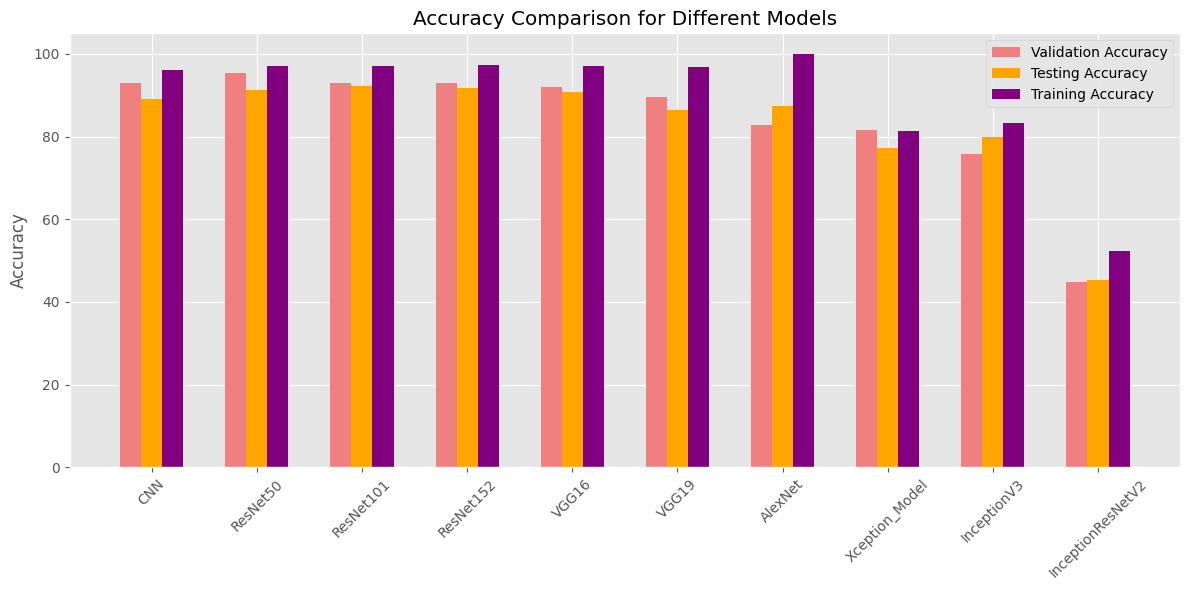

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ["CNN", "ResNet50", "ResNet101", "ResNet152", "VGG16", "VGG19", "AlexNet", "Xception_Model", "InceptionV3", "InceptionResNetV2"]

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of each bar
bar_width = 0.2
index = range(len(models))

# Plot Validation Accuracy
plt.bar([i - bar_width for i in index], val_acc, bar_width, label='Validation Accuracy', color='lightcoral')

# Plot Testing Accuracy
plt.bar(index, testing_acc, bar_width, label='Testing Accuracy', color='orange')

# Plot Training Accuracy
plt.bar([i + bar_width for i in index], train_acc, bar_width, label='Training Accuracy', color='purple')

# Set x-axis labels and rotation
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45)

# Set y-axis label
plt.ylabel('Accuracy')

# Set graph title
plt.title('Accuracy Comparison for Different Models')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


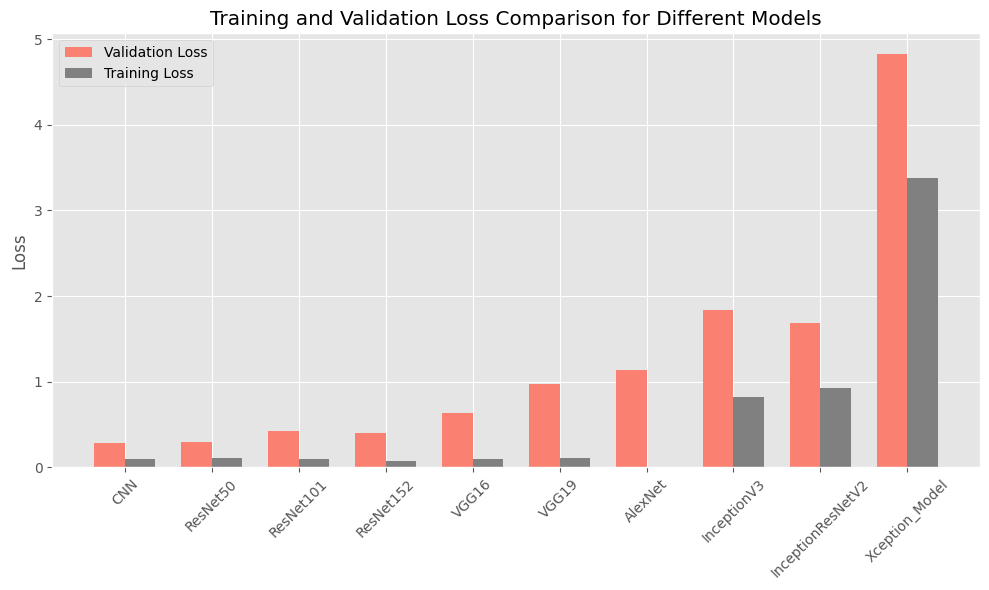

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["CNN", "ResNet50", "ResNet101", "ResNet152", "VGG16", "VGG19", "AlexNet", "InceptionV3", "InceptionResNetV2", "Xception_Model"]

# Set the width of each bar and the position for the bars
bar_width = 0.35
index = np.arange(len(models))

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Validation Loss
ax.bar(index - bar_width/2, Validation_loss, bar_width, label='Validation Loss', color='salmon')

# Plot Training Loss
ax.bar(index + bar_width/2, training_loss, bar_width, label='Training Loss', color='grey')

# Set x-axis labels and rotation
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45)

# Set y-axis label
ax.set_ylabel('Loss')

# Set graph title
ax.set_title('Training and Validation Loss Comparison for Different Models')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

